In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier # import KNeighbors ClaSSifier from sklearn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
df = pd.read_csv('/Users/tuhenasen/Downloads/training (1).csv')

In [ ]:
df.head()

In [217]:
df.info()

In [216]:
df.isnull().sum()

In [124]:
df['Damage'] = np.where(df['claim_amount'], 1, 0) 

In [125]:
df['pol_usage']=df.pol_usage.map({'WorkPrivate':0, 'Retired':1, 'Professional':2, 'AllTrips':3})
df['pol_payd']=df.pol_payd.map({'No':0, 'Yes':1})
df['vh_fuel']=df.vh_fuel.map({'Diesel':0, 'Gasoline':1, 'Hybrid':2})
df['vh_type']=df.vh_type.map({'Tourism':0, 'Commercial':1})

In [215]:
df.head()

In [127]:
data = df.drop(columns=['id_policy','pol_coverage','pol_pay_freq','drv_sex1','drv_drv2','drv_sex2','drv_age2','drv_age_lic2',
                        'vh_make_model'])

In [209]:
# replace na with 0
df.fillna(0, inplace = True)

In [147]:
X = data.drop(['claim_amount','Damage'],axis=1)
y = data['Damage']

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LOGISTIC MODEL

In [258]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

In [259]:
y_pred = model_logistic.predict(X_test)

In [260]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.10242310051704495
Mean Squared Error: 0.10242310051704495
Root Mean Squared Error: 0.32003609252246057
Accuracy: 0.897576899482955


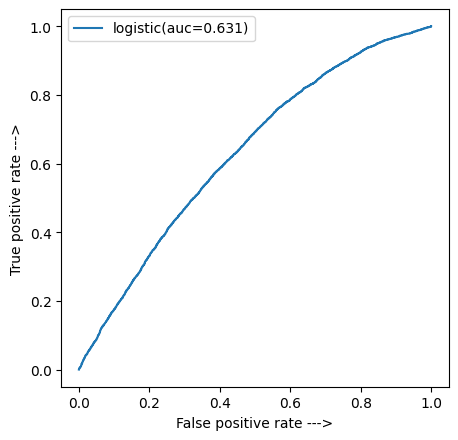

In [261]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr,logistic_tpr, marker=',', label='logistic(auc=%0.3f)' % auc_logistic)

plt.xlabel('False positive rate --->')
plt.ylabel('True positive rate --->')

plt.legend()

plt.show()

RANDOM FORREST CLASSIFIER

In [262]:
from math import *
from sklearn.ensemble import RandomForestClassifier

RandomForrest_model= RandomForestClassifier(n_estimators=500,min_samples_leaf = 20)
RandomForrest_model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

RandomForrest_model.score(X_test,y_test)


In [ ]:
y_pred1 = RandomForrest_model.predict(X_test)

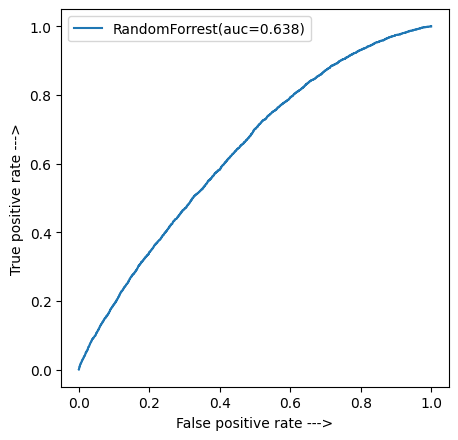

In [264]:
y_pred_proba = RandomForrest_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr,tpr, marker=',', label='RandomForrest(auc=%0.3f)' % auc)

plt.xlabel('False positive rate --->')
plt.ylabel('True positive rate --->')

plt.legend()

plt.show()

GAUSSIAN NAIVE BAYES MODEL

In [266]:
# build model   
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

# Predict Output
predicted= model.predict(X_test)
    
# Making the Confusion Matrix
cm = confusion_matrix(y_test, predicted)
ac = accuracy_score(y_test, predicted)
print({ 'accuracy' : ac})
print({'confution matrix:' : cm})

{'accuracy': 0.8740469722197879}
{'confution matrix:': array([[40805,   164],
       [ 4642,    33]])}


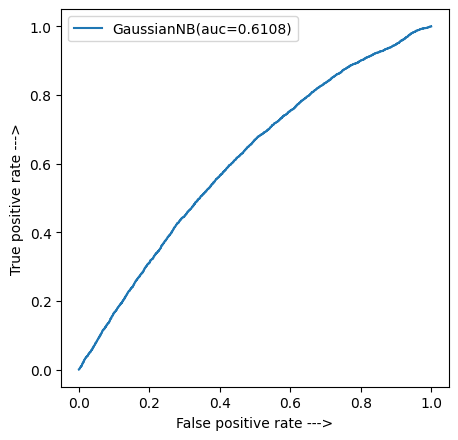

In [267]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr,tpr, marker=',', label='GaussianNB(auc=%0.4f)' % auc)

plt.xlabel('False positive rate --->')
plt.ylabel('True positive rate --->')

plt.legend()

plt.show()

KNN MODEL

In [ ]:
# Cross-validation
k_range = range(1,15)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

In [241]:
# instantiate the model with k= 12
knn = KNeighborsClassifier(n_neighbors= 12 )


# fit the model to the training set
knn.fit(X_train, y_train)


# predict on the test-set
y_pred = knn.predict(X_test)


print('Model accuracy score with k= 12: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with k= 12: 0.8973


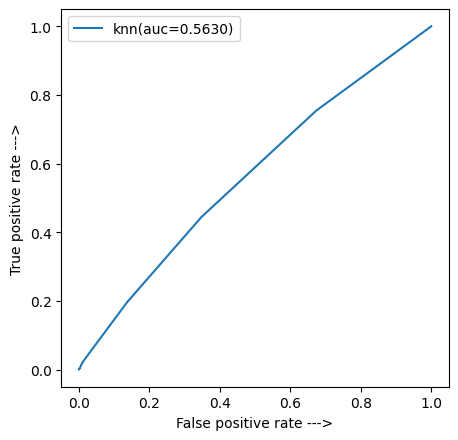

In [246]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr,tpr, marker=',', label='knn(auc=%0.4f)' % auc)

plt.xlabel('False positive rate --->')
plt.ylabel('True positive rate --->')

plt.legend()

plt.show()

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 0)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

In [ ]:
# predict on the test-set
pred = model_SVC.predict(X_test)


print('Model accuracy score {0:0.4f}'. format(accuracy_score(y_test, pred)))

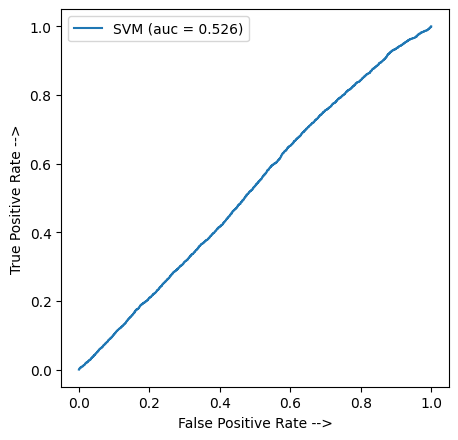

In [256]:
from sklearn.metrics import roc_curve, auc



svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

NAIVE BAYES

#KNN